In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
import pandas as pd

data = {
    "CustomerID": [1,2,3,4,5,6,7,8,9,10],
    "Gender": ["Male","Male","Female","Female","Female",
               "Female","Female","Female","Male","Female"],
    "Age": [19,21,20,23,31,22,35,23,64,30],
    "Annual Income (k$)": [15,15,16,16,17,17,18,18,19,19],
    "Spending Score (1-100)": [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)


In [15]:
df.to_csv("Mall_Customers.csv", index=False)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check missing values
df.isnull().sum()

# Drop unnecessary column
df = df.drop("CustomerID", axis=1)

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

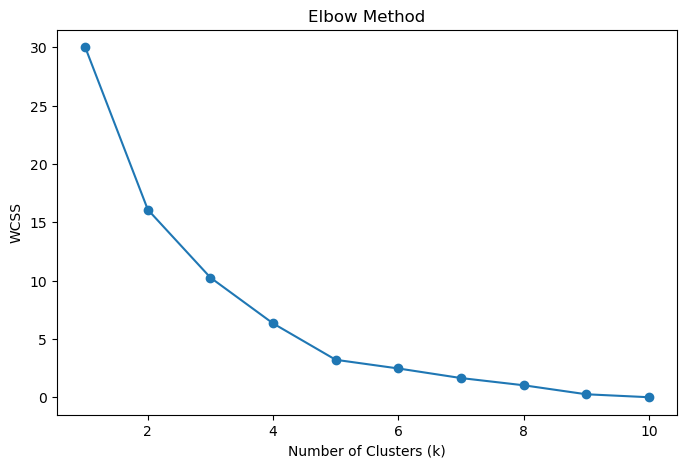

In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


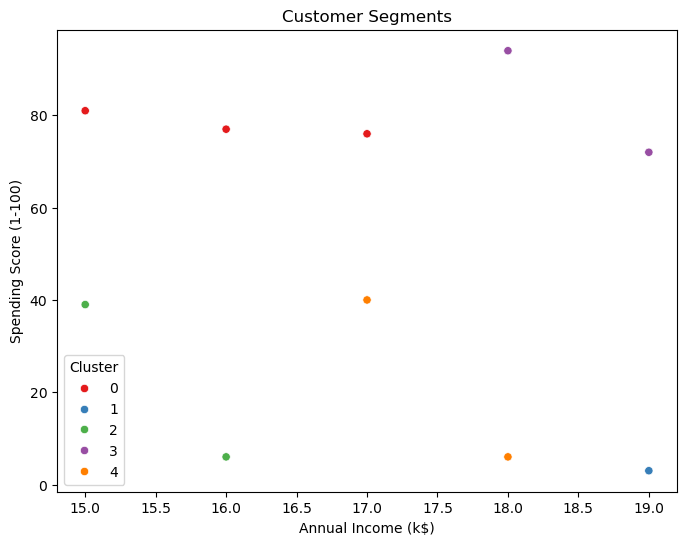

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("Customer Segments")
plt.show()

In [12]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.666667,22.0,16.0,78.0
1,0.000000,64.0,19.0,3.0
2,0.500000,19.5,15.5,22.5
3,1.000000,26.5,18.5,83.0
4,1.000000,33.0,17.5,23.0


In [13]:
df.to_csv("Customer_Segmentation_Output.csv", index=False)